**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

* NOMBRE: Carlos Alejandro Herrera Legaspi, MATRÍCULA: A01751709
* NOMBRE: Hesus García Cobos, MATRÍCULA: A01129778
* NOMBRE: Rafael Mandujano Núñez, MATRÍCULA: A00824644
* NOMBRE: Omar Aguilar Macedo, MATRÍCULA: A01797078

### **📌 Introducción al Proyecto: Análisis de Cereales y PCA**
El objetivo de este proyecto es analizar un conjunto de datos sobre cereales de distintas marcas para extraer información relevante sobre sus características nutricionales y su impacto en las calificaciones de los consumidores.

A través de un análisis exploratorio de datos (EDA), examinaremos la distribución de calorías, azúcar, fibra y otros componentes clave de los cereales, identificando patrones y tendencias.

Posteriormente, aplicaremos **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad del conjunto de datos y determinar qué características son las más influyentes en la calificación de los cereales.

---

### **Diccionario de Datos**

| **Variable**   | **Descripción** |
|---------------|----------------|
| `Name`        | Nombre del cereal |
| `mfr`         | Fabricante del cereal: |
|               | - `A` = American Home Food Products |
|               | - `G` = General Mills |
|               | - `K` = Kellogg's |
|               | - `N` = Nabisco |
|               | - `P` = Post |
|               | - `Q` = Quaker Oats |
|               | - `R` = Ralston Purina |
| `type`        | Tipo de cereal (`cold` = frío, `hot` = caliente) |
| `calories`    | Calorías por porción |
| `protein`     | Gramos de proteína por porción |
| `fat`         | Gramos de grasa por porción |
| `sodium`      | Miligramos de sodio por porción |
| `fiber`       | Gramos de fibra dietética por porción |
| `carbo`       | Gramos de carbohidratos complejos por porción |
| `sugars`      | Gramos de azúcar por porción |
| `potass`      | Miligramos de potasio por porción |
| `vitamins`    | Porcentaje de vitaminas y minerales recomendados por la FDA (`0`, `25` o `100`) |
| `shelf`       | Nivel del estante de exhibición (`1`, `2` o `3`, contando desde el suelo) |
| `weight`      | Peso en onzas de una porción |
| `cups`        | Número de tazas en una porción |
| `rating`      | Calificación del cereal (posiblemente de Consumer Reports) |

Este conjunto de datos ha sido recopilado y limpiado por **Petra Isenberg, Pierre Dragicevic y Yvonne Jansen** y se ha convertido en formato **CSV** para facilitar su análisis.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder




read_from_drive = 0  # Set to 1 to read from Google Drive, 0 to read from local folder

if read_from_drive:
    from google.colab import drive
    drive.mount('/content/drive')
    # DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
    DIR = "/content/drive/MyDrive/TC4029/actividades/07"
else:
    DIR = "./data"

os.chdir(DIR)

In [2]:
# Set plot styles and configurations
plt.style.use('ggplot')
sns.set(style='whitegrid', palette='Set2')

# Set figure size and layout
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['figure.autolayout'] = True

# Plot inline in Jupyter Notebook
%matplotlib inline

# Other useful configurations
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 12

In [3]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

<div class="alert alert-block alert-warning">
1. Obtén estadísticas descriptivas para todas las variables del dataframe.
</div>

In [4]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [5]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [6]:
cereals_df.describe(include = 'object').T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


<div class="alert alert-block alert-warning">
Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?
</div>

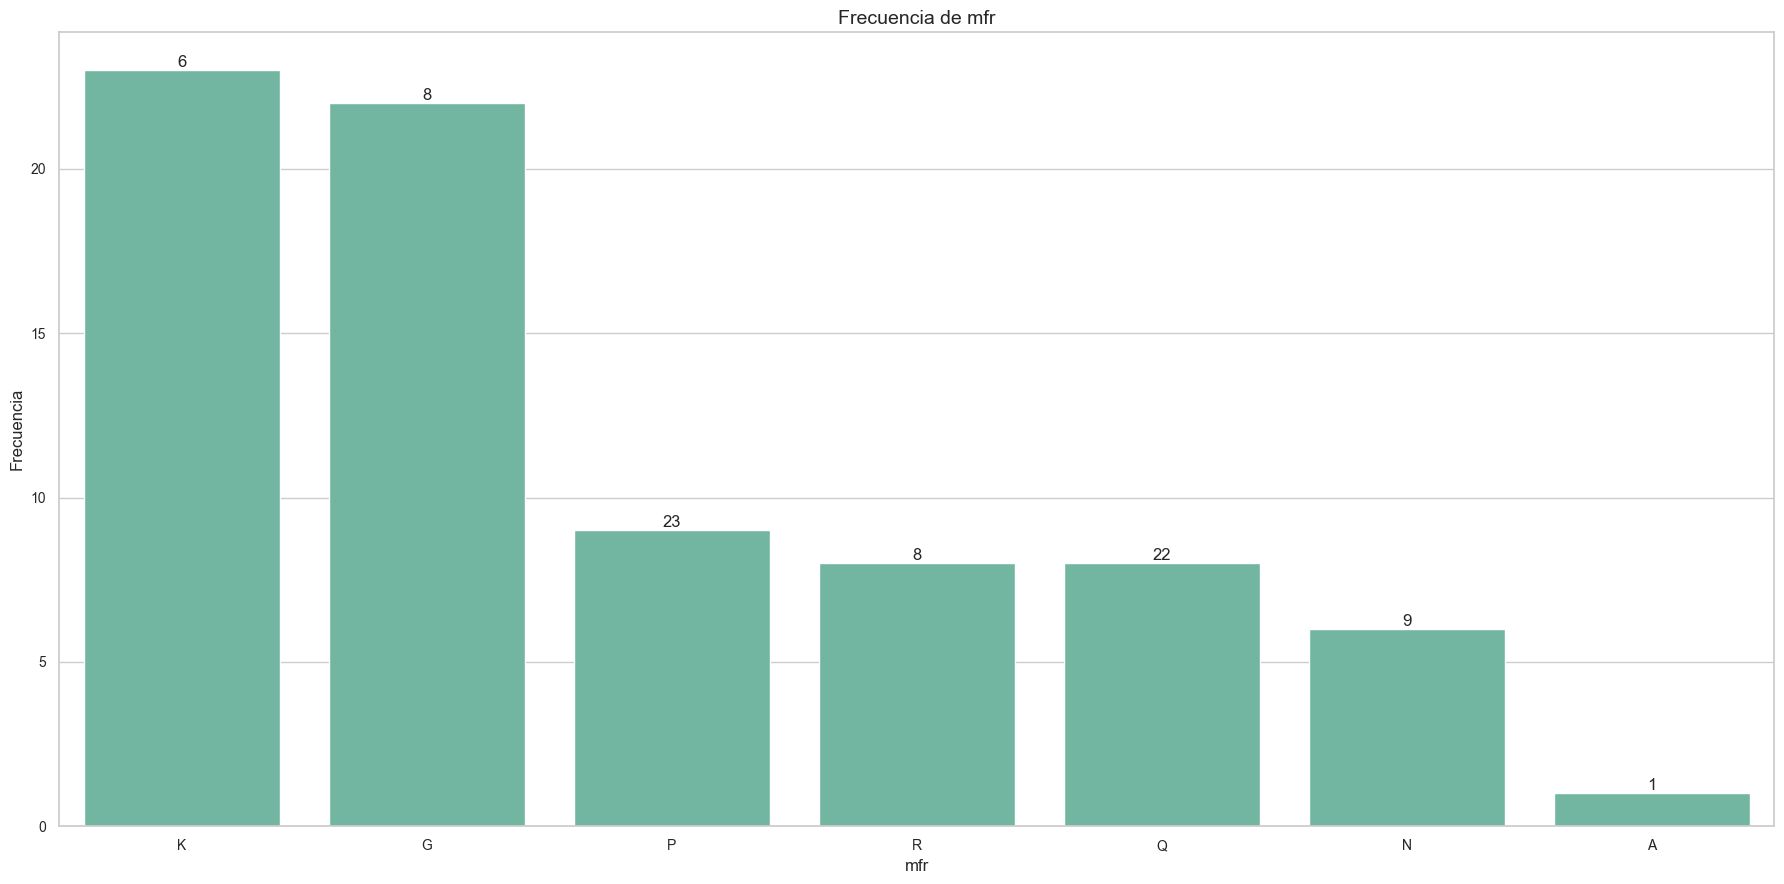

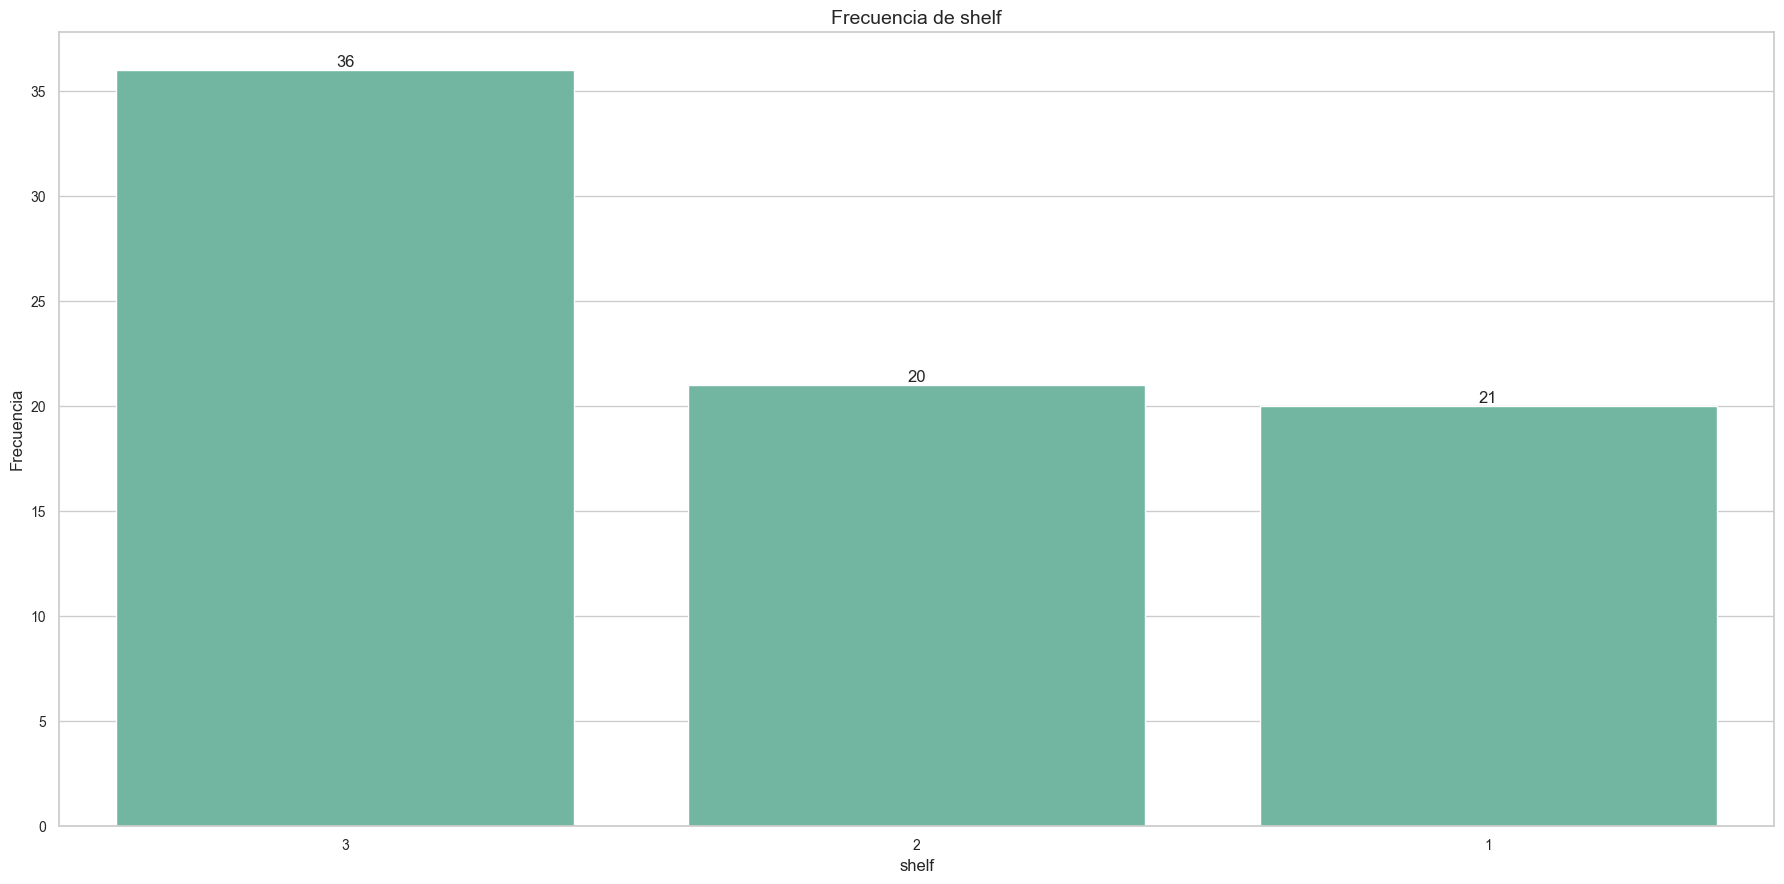

In [7]:
def draw_countplot(col, df):
  # Ordenar los valores de la columna
  ordered_df = df[col].value_counts().sort_values(ascending=False).index
  ax = sns.countplot(x=col, data=df, order=ordered_df)
  col_counts = df[col].value_counts(sort=False).values
  ax.bar_label(container=ax.containers[0], labels=col_counts)
  ax.set_title(f'Frecuencia de {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frecuencia')
  plt.show()

columns = ['mfr', 'shelf']
for col in columns:
  draw_countplot(col, cereals_df)

In [8]:
# Frequencias por fabricante 'mfr'
cereals_df['mfr'].value_counts()

mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64

In [9]:
# Frecuencias por estante de exhibición
cereals_df['shelf'].value_counts()

shelf
3    36
2    21
1    20
Name: count, dtype: int64

<div class="alert alert-block alert-warning">
2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.
</div>

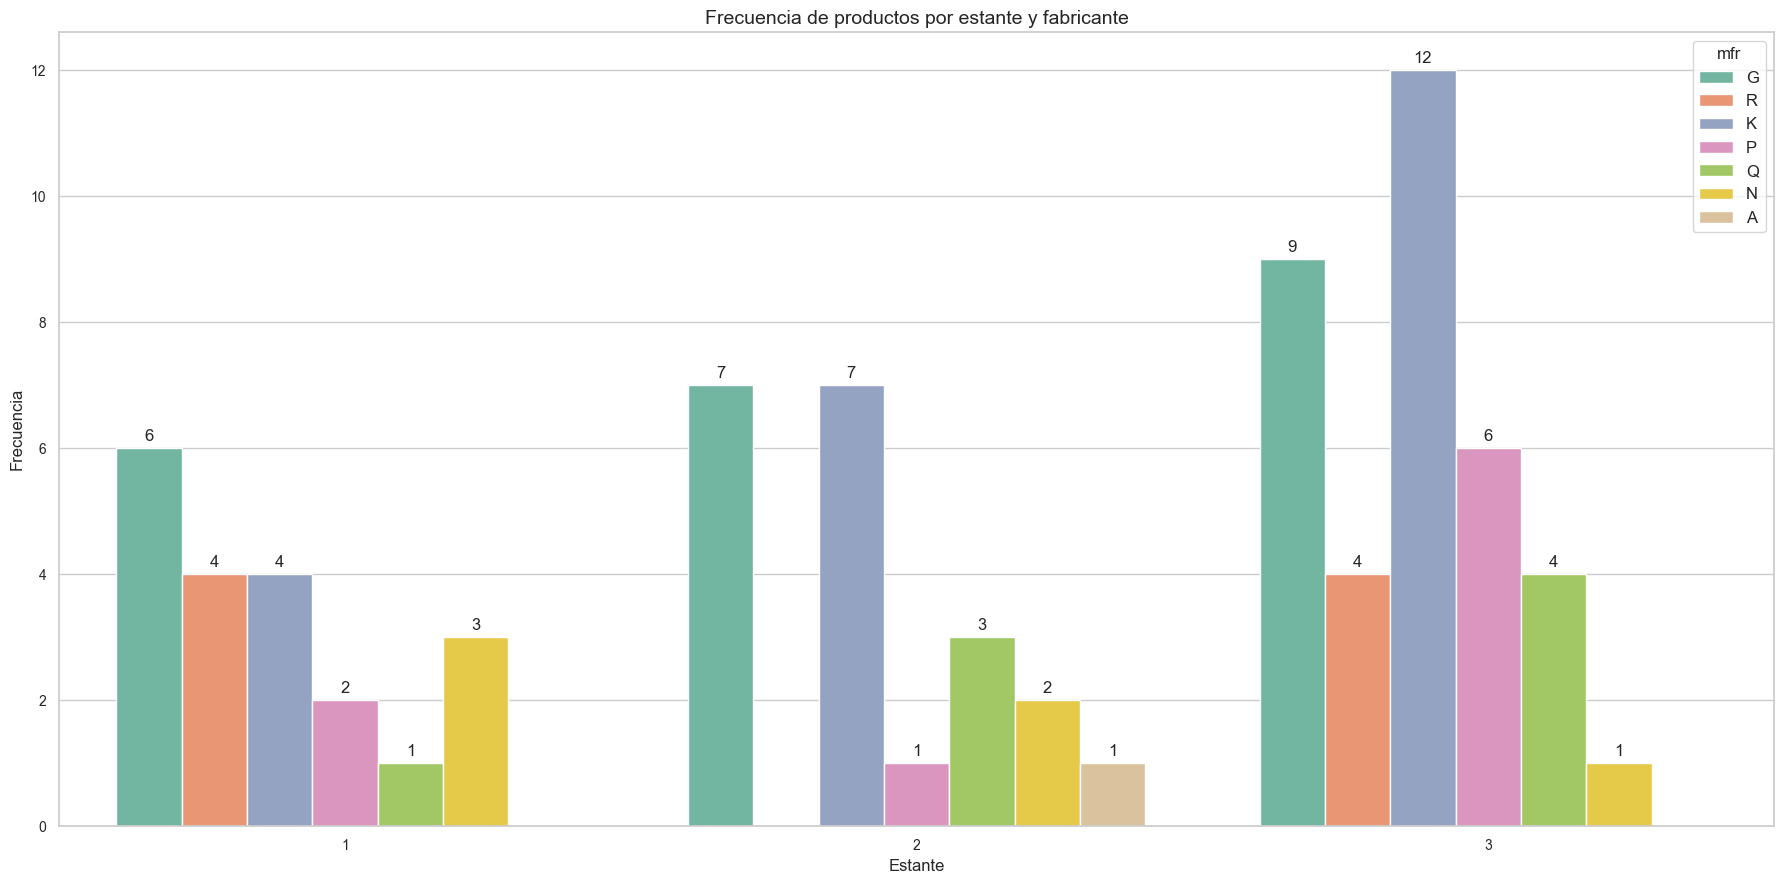

In [10]:
ax = sns.countplot(data=cereals_df, x='shelf', hue='mfr')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax.set_title('Frecuencia de productos por estante y fabricante')
ax.set_xlabel('Estante')
ax.set_ylabel('Frecuencia')
plt.show()

In [11]:
cereals_df.groupby('mfr')['shelf'].value_counts().unstack(fill_value = 0)

shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


<div class="alert alert-block alert-warning">
 3a) ¿Cuál es el rango más frecuente de la variable `rating`?
 </div>

In [12]:
# Calcular los bins utilizando la regla de Sturges
sturges_bins = int(np.ceil(1 + np.log2(len(cereals_df['rating']))))
bins_sturges = np.histogram_bin_edges(cereals_df['rating'], bins=sturges_bins)

# Crear una tabla con los bins y sus respectivos conteos
bins_sturges_df = pd.cut(
    cereals_df['rating'],
    bins=bins_sturges,
    precision=0
).value_counts(sort=False).reset_index()

bins_sturges_df.columns = ['Bin', 'Count']

# Ordenar los resultados por la columna 'Count' en orden descendente
bins_sturges_df = bins_sturges_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Resaltar los valores máximos con un fondo de color
bins_sturges_df_html = bins_sturges_df.to_html(index=False)
max_count = bins_sturges_df['Count'].max()
bins_sturges_df_html = bins_sturges_df_html.replace(f'>{max_count}<', f' style="background-color: #FFEB99; font-weight: bold; color: black">{max_count}<')

# Mostrar los resultados en una tabla HTML con el valor máximo resaltado
display(HTML(bins_sturges_df_html))

Bin,Count
"(28.0, 37.0]",22
"(37.0, 46.0]",22
"(46.0, 56.0]",14
"(56.0, 65.0]",7
"(18.0, 28.0]",6
"(65.0, 75.0]",4
"(84.0, 94.0]",1
"(75.0, 84.0]",0


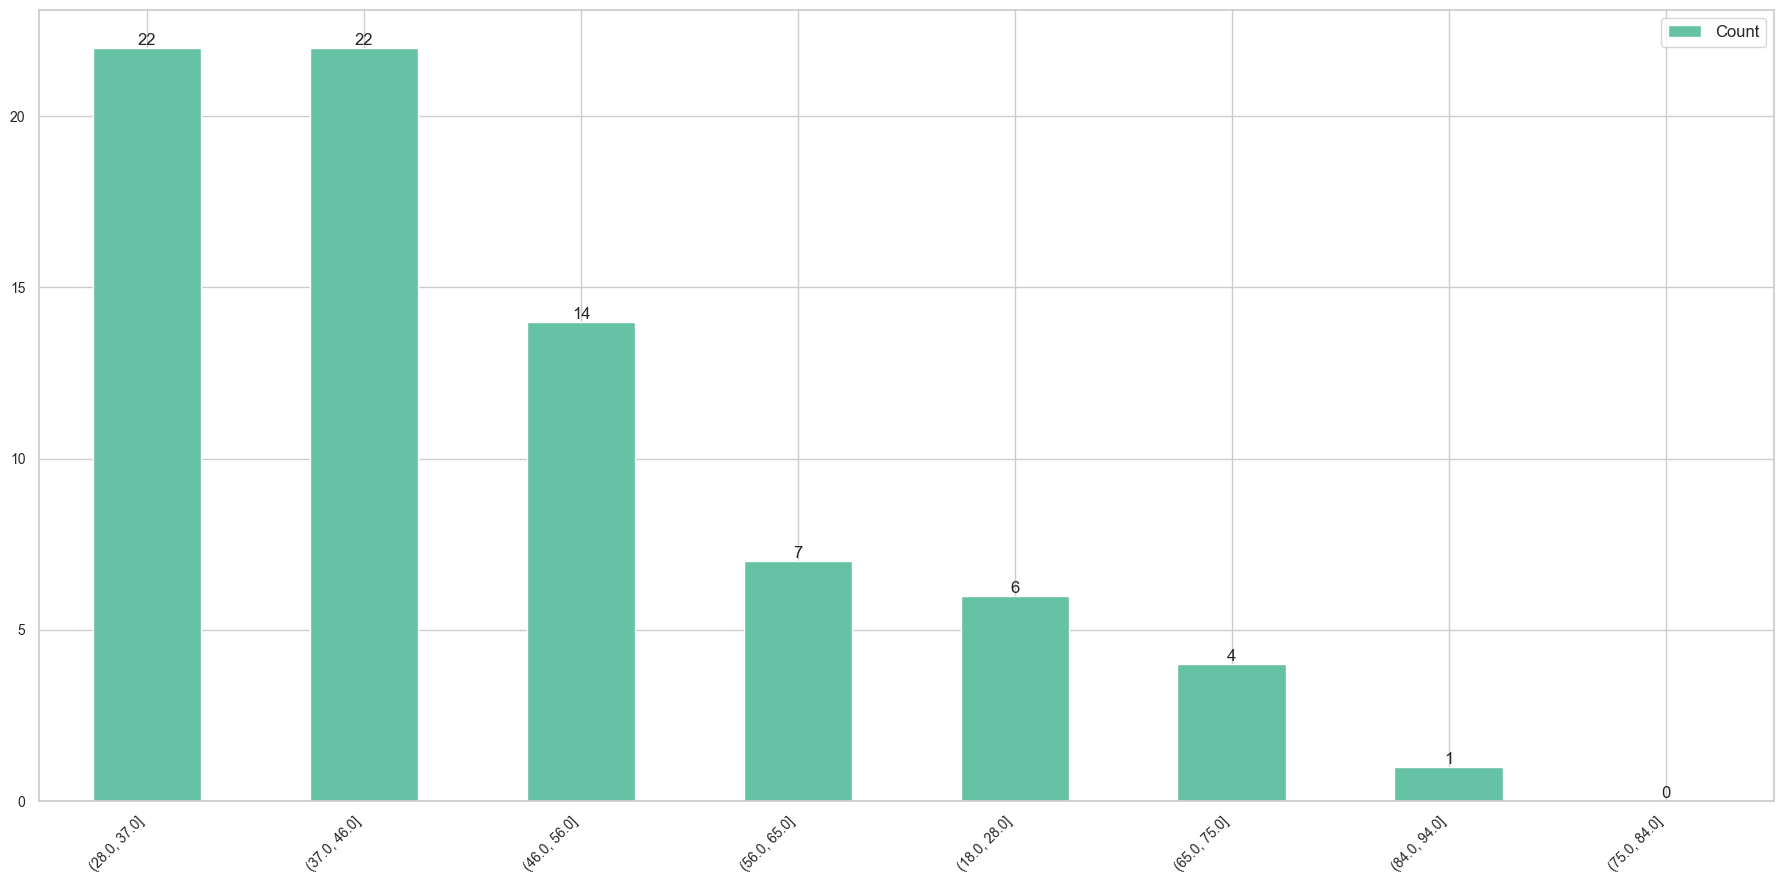

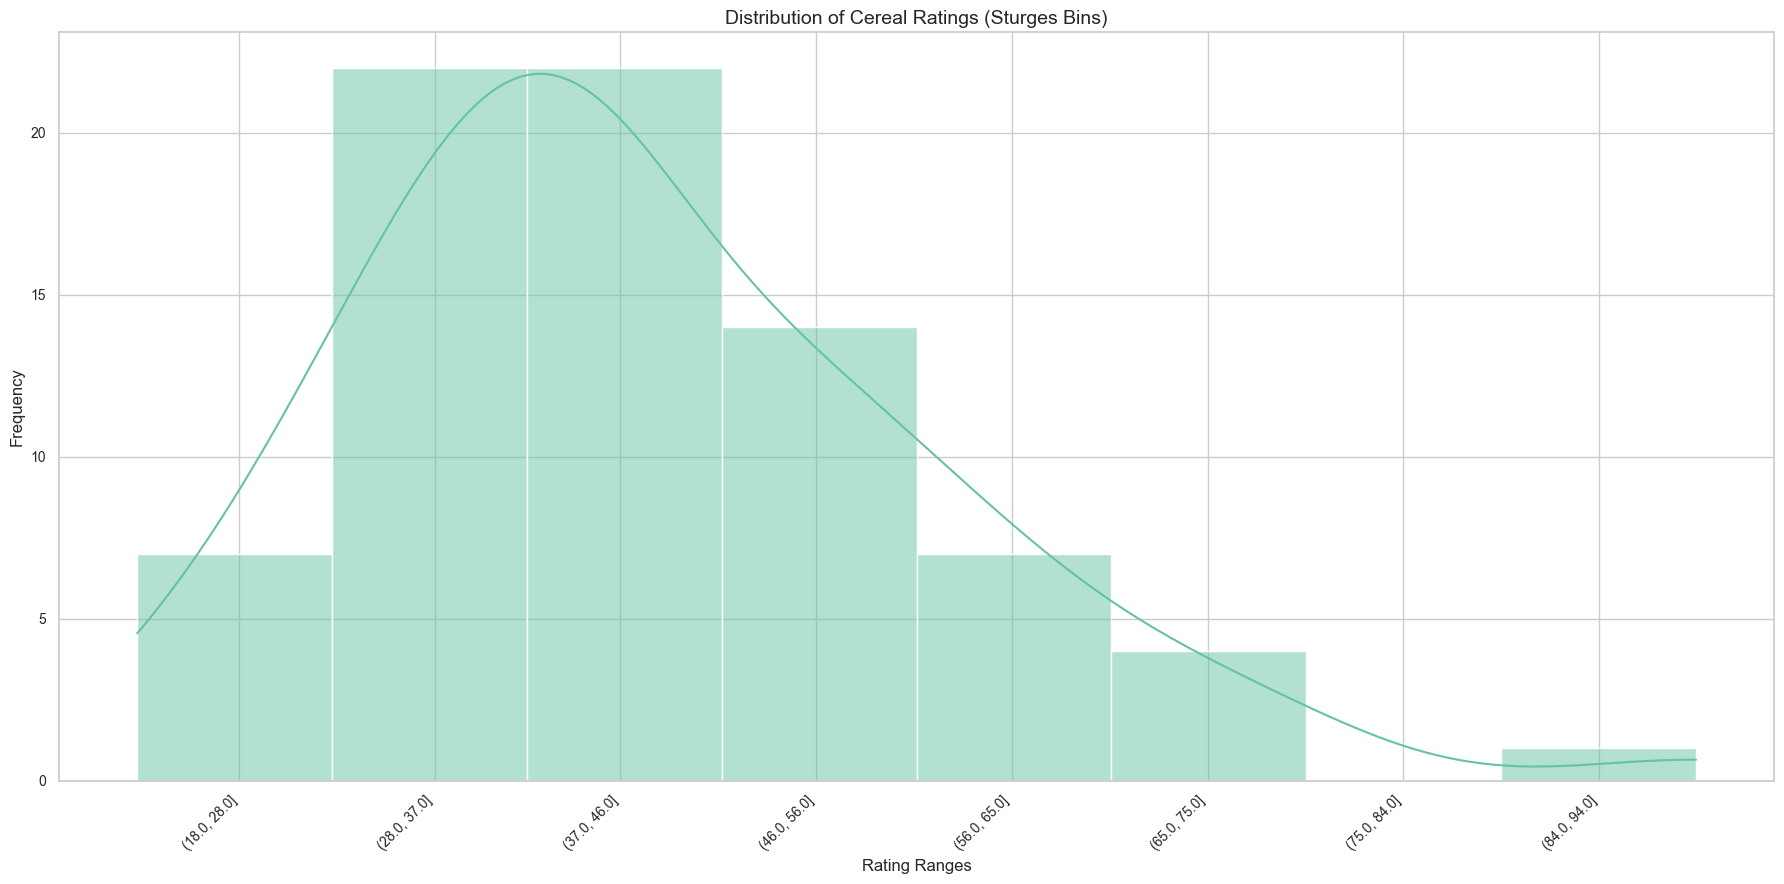

In [13]:
# Plot the bar chart with proper labels
ax = bins_sturges_df.plot(kind='bar')
ax.bar_label(container=ax.containers[0], labels=bins_sturges_df['Count'])
ax.set_xticklabels(bins_sturges_df['Bin'], rotation=45, ha='right')
plt.show()

# Plot the histogram with Sturges bins



# Create the histogram with Seaborn
ax = sns.histplot(cereals_df['rating'], bins=sturges_bins, kde=True)

# Set custom labels for x-axis
ax.set_xticks([(interval.left + interval.right) / 2 for interval in bins_sturges_df['Bin']])  # Position at bin centers
ax.set_xticklabels(bins_sturges_df['Bin'], rotation=45, ha='right')

# Titles and labels
plt.xlabel("Rating Ranges")
plt.ylabel("Frequency")
plt.title("Distribution of Cereal Ratings (Sturges Bins)")

# Show plot
plt.show()

<div class="alert alert-block alert-success">
<b>Respuesta a la pregunta</b> <a class="tocSkip"></a><br>

Los dos rangos más frecuentes de `rating`, según la regla de Sturges, son:

- **(28.0, 37.0]**  
- **(37.0, 46.0]**

Ambos contienen la mayor cantidad de observaciones, lo que indica que la mayoría de los cereales tienen calificaciones en estos intervalos.

</div>



<div class="alert alert-block alert-warning">
3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?
</div>

In [14]:
top_10_cereals_df = cereals_df[['name', 'rating', 'mfr']].nlargest(10, 'rating')

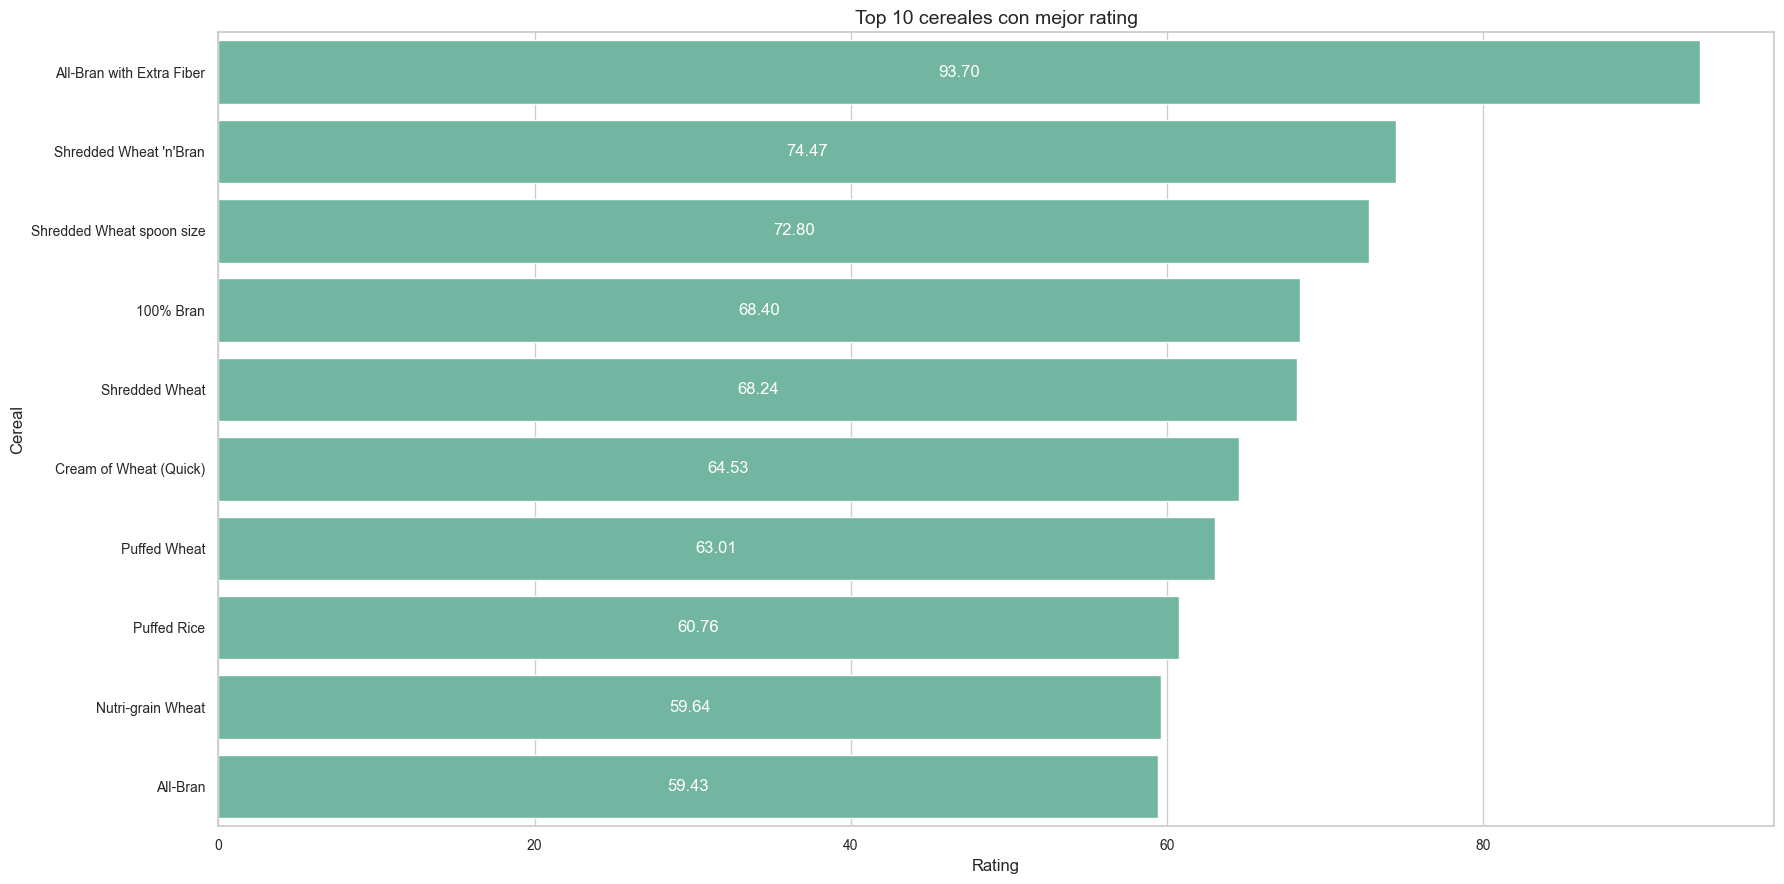

In [15]:
# Replace underscores with spaces in the 'name' column
top_10_cereals_df['name'] = top_10_cereals_df['name'].str.replace('_', ' ')

ax = sns.barplot(data=top_10_cereals_df, y='name', x='rating')
plt.title('Top 10 cereales con mejor rating')
plt.xlabel('Rating')
plt.ylabel('Cereal')

for index, value in enumerate(top_10_cereals_df['rating']):
    ax.text(
        value / 2,
        index,
        "{:.2f}".format(value),
        va='center',
        ha='center',
        color='white'
    )
plt.show()

In [16]:
top_10_cereals_df

,name,rating,mfr
3,All-Bran with Extra Fiber,93.704912,K
64,Shredded Wheat 'n'Bran,74.472949,N
65,Shredded Wheat spoon size,72.801787,N
0,100% Bran,68.402973,N
63,Shredded Wheat,68.235885,N
20,Cream of Wheat (Quick),64.533816,N
55,Puffed Wheat,63.005645,Q
54,Puffed Rice,60.756112,Q
50,Nutri-grain Wheat,59.642837,K
2,All-Bran,59.425505,K


<div class="alert alert-block alert-warning">

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.
</div>

C:\Users\HG_Co\AppData\Local\Temp\ipykernel_36000\455033320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cereals_df, x='calories', y='mfr', palette='Set2')


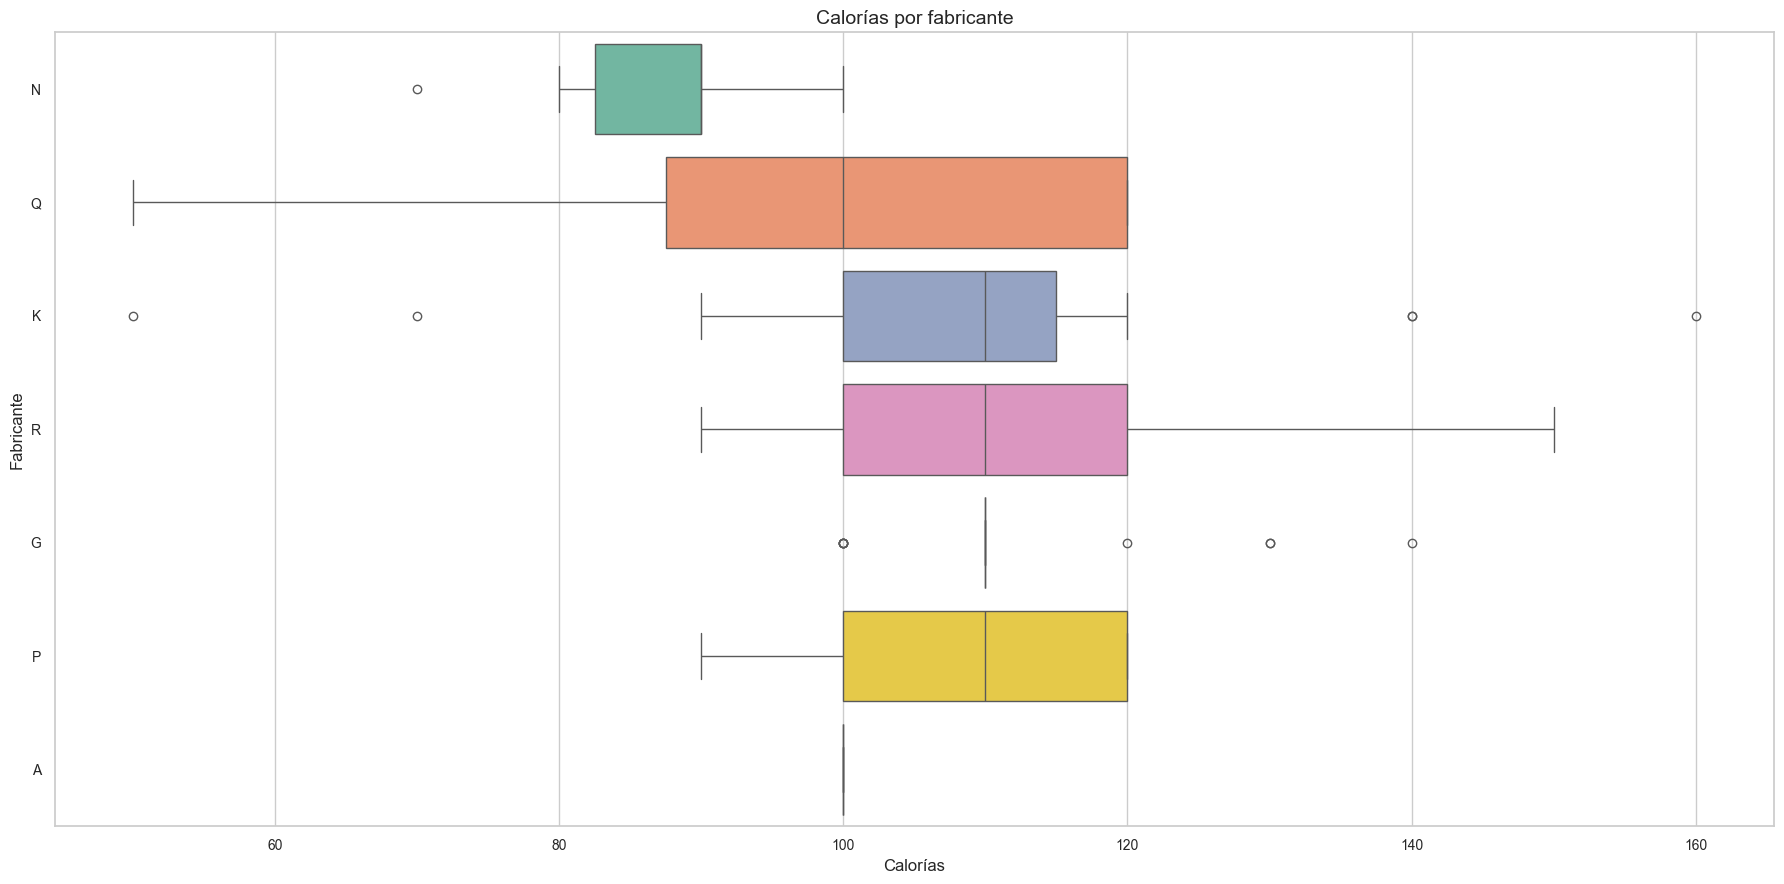

In [17]:
sns.boxplot(data=cereals_df, x='calories', y='mfr', palette='Set2')
plt.title('Calorías por fabricante')
plt.xlabel('Calorías')
plt.ylabel('Fabricante')
plt.show()

<div class="alert alert-block alert-warning"> 
4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?
</div>

In [18]:
corr_mat = cereals_df.corr(numeric_only = True)
corr_mat['rating'].drop('rating').abs().nlargest(2)

sugars      0.763902
calories    0.689376
Name: rating, dtype: float64

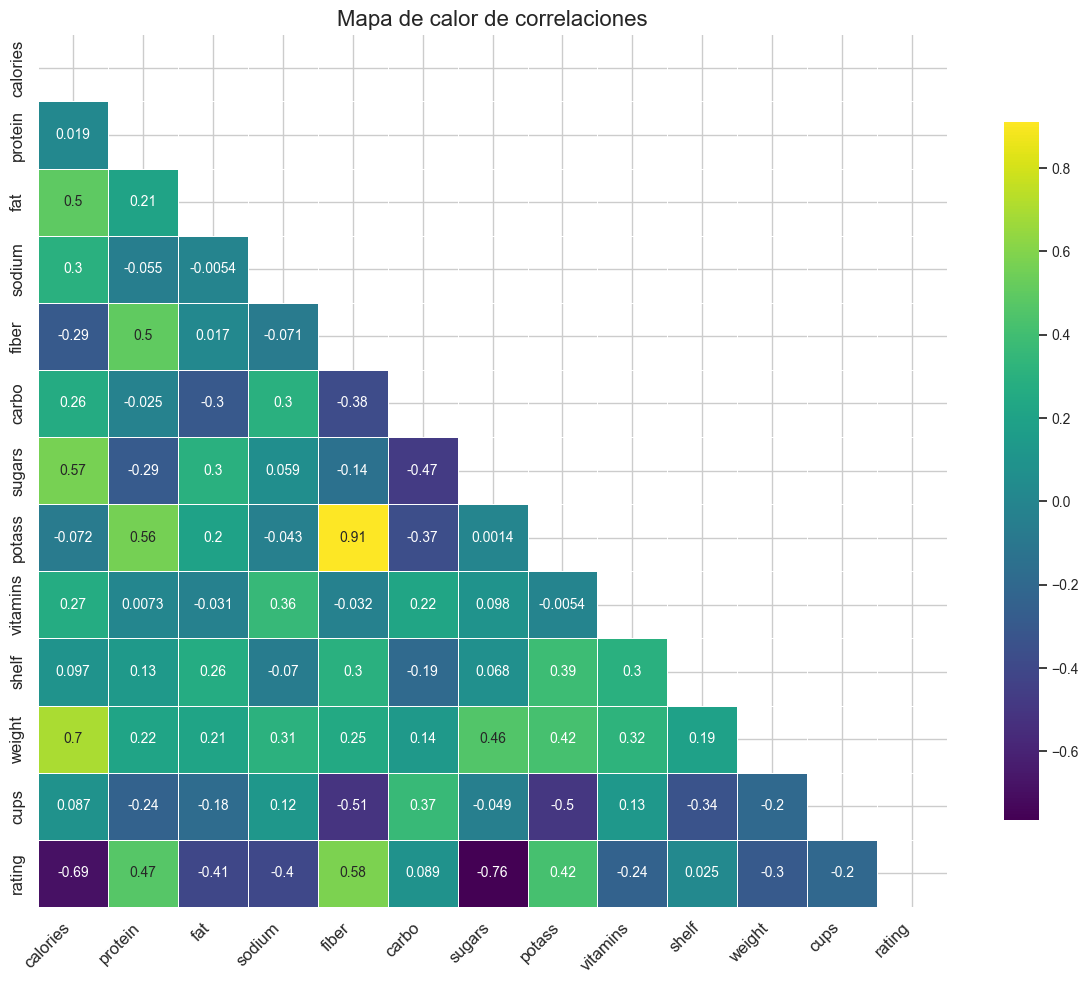

In [19]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap='viridis', annot=True, ax=ax, linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": .8})

# Set titles and labels
ax.set_title('Mapa de calor de correlaciones', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

<div class="alert alert-block alert-success">
<b>Respuesta a la pregunta</b> <a class="tocSkip"></a><br>

Las dos variables que tienen mayor correlación con `rating` son:

1. **`sugars` (azúcares)** con una correlación de **-0.76** (inversa).
2. **`calories` (calorias)** con una correlación de **0.69**.

Esto sugiere que los cereales con más fibra suelen tener calificaciones más altas, mientras que aquellos con mayor contenido de azúcar tienden a recibir calificaciones más bajas.

</div>


<div class="alert alert-block alert-warning">

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.
 </div>

In [20]:
# filas con valores faltantes
cereals_df[cereals_df.isna().any(axis=1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


In [21]:
cereals_df = cereals_df.dropna().reset_index(drop = True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

<div class="alert alert-block alert-warning">

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

</div>

In [22]:
numeric_columns = cereals_df.select_dtypes(include=['number']).columns
X = cereals_df[numeric_columns].drop(columns=['rating'])  # Predictoras numéricas
y = cereals_df['rating']  # Variable objetivo

In [23]:
X.head(1).T

,0
calories,70.00
protein,4.00
fat,1.00
sodium,130.00
fiber,10.00
carbo,5.00
sugars,6.00
potass,280.00
vitamins,25.00
shelf,3.00


In [24]:
y.head(1)

0    68.402973
Name: rating, dtype: float64

In [25]:
n_components = X.shape[1]
print(f"Número de componentes: {n_components}")

Número de componentes: 12


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,type
0,70.000000,4.000000,1.0,130.000000,10.000000,5.000000,6.000000,280.000000,25.000000,3.000000,1.000000,0.330000,Original
1,120.000000,3.000000,5.0,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3.000000,1.000000,1.000000,Original
2,70.000000,4.000000,1.0,260.000000,9.000000,7.000000,5.000000,320.000000,25.000000,3.000000,1.000000,0.330000,Original
3,50.000000,4.000000,0.0,140.000000,14.000000,8.000000,0.000000,330.000000,25.000000,3.000000,1.000000,0.500000,Original
4,110.000000,2.000000,2.0,180.000000,1.500000,10.500000,10.000000,70.000000,25.000000,1.000000,1.000000,0.750000,Original
0,-1.878652,1.391180,0.0,-0.393692,3.250706,-2.517206,-0.255940,2.578001,-0.183083,0.948401,-0.202203,-2.099895,Escalado
1,0.658214,0.455295,4.0,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,Escalado
2,-1.878652,1.391180,0.0,1.187651,2.835245,-1.999780,-0.486911,3.146198,-0.183083,0.948401,-0.202203,-2.099895,Escalado
3,-2.893399,1.391180,-1.0,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,Escalado
4,0.150841,-0.480589,1.0,0.214517,-0.280717,-1.094285,0.667942,-0.405032,-0.183083,-1.471657,-0.202203,-0.305922,Escalado


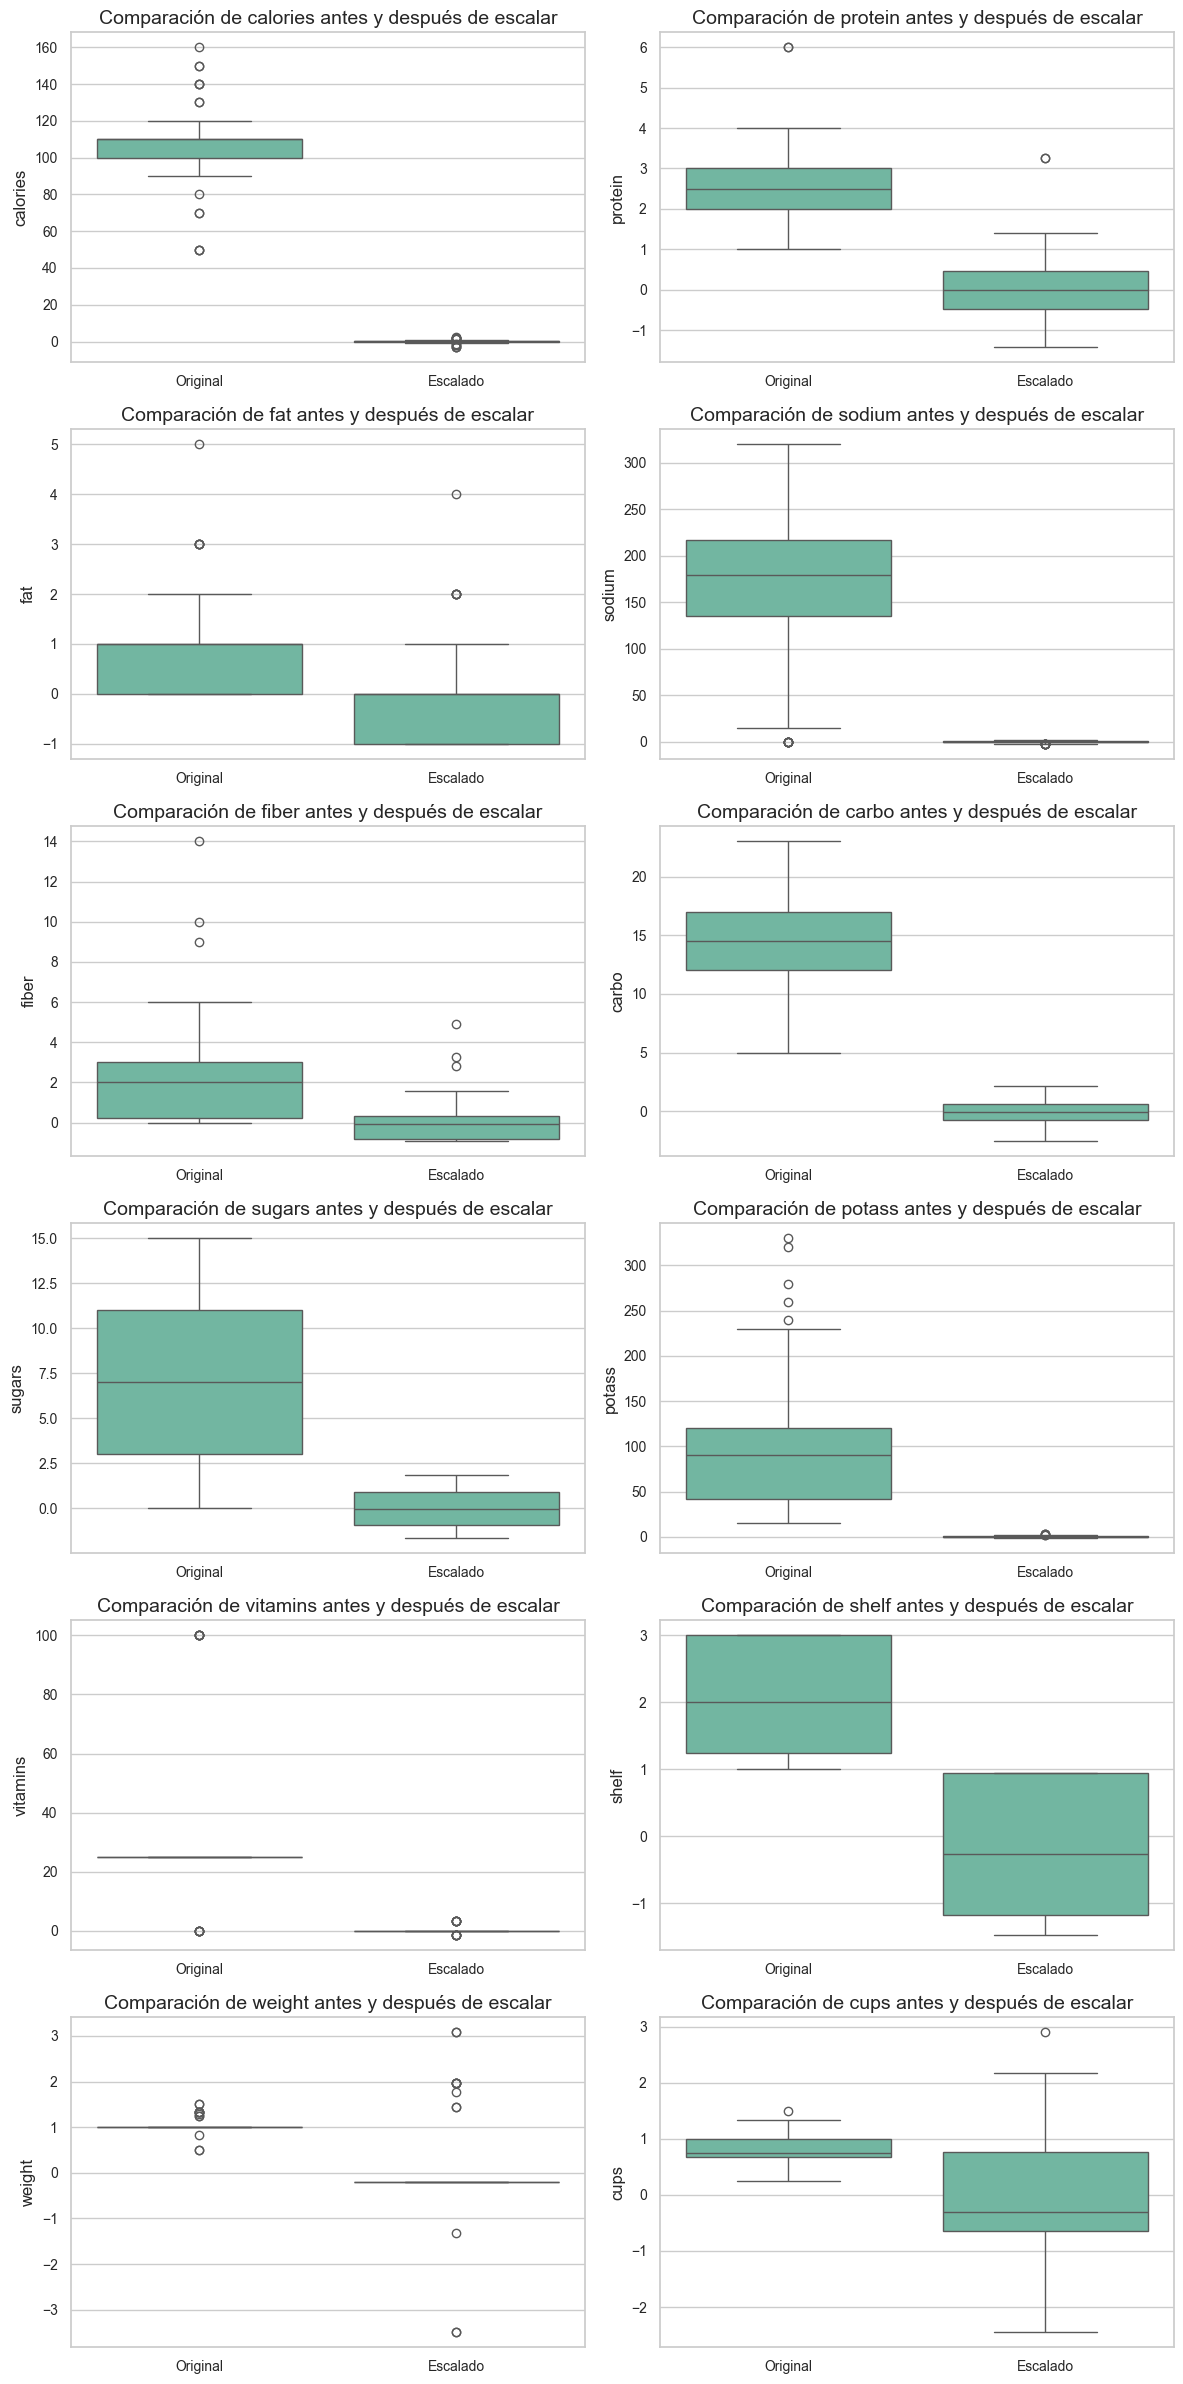

In [26]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear DataFrames con los datos originales y escalados
comparison_df = X.copy()
comparison_df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

comparison_df['type'] = 'Original'
comparison_df_scaled['type'] = 'Escalado'

# Concatenar ambos DataFrames
comparison_df = pd.concat([comparison_df, comparison_df_scaled])

display(comparison_df.groupby('type').head(5))

num_features = len(numeric_columns[:-1])
num_cols = 2  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0) 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()  
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

for i, col in enumerate(numeric_columns[:-1]):
    sns.boxplot(x='type', y=col, data=comparison_df, ax=axes[i])
    axes[i].set_title(f'Comparación de {col} antes y después de escalar')
    axes[i].set_xlabel("") 
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [27]:
pca_model = PCA()
X_pca = pca_model.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])
X_pca_df.head(5).T


,0,1,2,3,4
PC1,4.870399,1.761110,4.727161,5.142814,-0.332394
PC2,-2.934238,0.210993,-2.402254,-4.401826,0.284619
PC3,-0.055266,-3.014058,0.869028,1.883153,-1.490929
PC4,0.244647,-0.494129,-0.095823,0.209854,-0.944313
PC5,-1.102035,3.275506,-1.357388,-1.662387,-0.311262
PC6,0.904575,1.065041,1.393861,0.955808,0.828872
PC7,0.235388,-0.489640,1.210340,-0.289695,0.493652
PC8,-0.247787,0.895201,0.182089,0.865569,-0.808361
PC9,-0.124799,-0.835394,0.139267,-0.682678,-0.712896
PC10,-0.046331,0.595071,-0.090776,-0.099300,0.100511


<div class="alert alert-block alert-warning">
7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

</div>

In [28]:
print("Valores propios: ", list(np.round(pca_model.explained_variance_, decimals=5)))

Valores propios:  [np.float64(3.36485), np.float64(2.68343), np.float64(1.81049), np.float64(1.03151), np.float64(0.99776), np.float64(0.69923), np.float64(0.66888), np.float64(0.42177), np.float64(0.31803), np.float64(0.09305), np.float64(0.05706), np.float64(0.01831)]


In [29]:
varianza_acumulada = np.cumsum(pca_model.explained_variance_ratio_)
print(f"varianza acumulada: {varianza_acumulada}")

# componentes requeridos para explicar mas del 90% de la varianza
num_componentes = np.argmax(varianza_acumulada >= .9 ) + 1
print(f"Se necesitan {num_componentes} componentes para explicar el 90% de la varianza")


varianza acumulada: [0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]
Se necesitan 7 componentes para explicar el 90% de la varianza


In [30]:
cumulative = 0
for i in range(0, n_components):
  comp_perc = round(pca_model.explained_variance_ratio_[i] * 100, 2)
  cumulative = cumulative + comp_perc
  comp_perc_str = "{:.2f}".format(comp_perc)
  cumulative_str = "{:.0f}".format(cumulative)
  print(f"El porcentaje de varianza acumulada explicada por el componente {i + 1} es {comp_perc_str}%, acumulado: {cumulative_str}%")


El porcentaje de varianza acumulada explicada por el componente 1 es 27.66%, acumulado: 28%
El porcentaje de varianza acumulada explicada por el componente 2 es 22.06%, acumulado: 50%
El porcentaje de varianza acumulada explicada por el componente 3 es 14.88%, acumulado: 65%
El porcentaje de varianza acumulada explicada por el componente 4 es 8.48%, acumulado: 73%
El porcentaje de varianza acumulada explicada por el componente 5 es 8.20%, acumulado: 81%
El porcentaje de varianza acumulada explicada por el componente 6 es 5.75%, acumulado: 87%
El porcentaje de varianza acumulada explicada por el componente 7 es 5.50%, acumulado: 93%
El porcentaje de varianza acumulada explicada por el componente 8 es 3.47%, acumulado: 96%
El porcentaje de varianza acumulada explicada por el componente 9 es 2.61%, acumulado: 99%
El porcentaje de varianza acumulada explicada por el componente 10 es 0.76%, acumulado: 99%
El porcentaje de varianza acumulada explicada por el componente 11 es 0.47%, acumulado

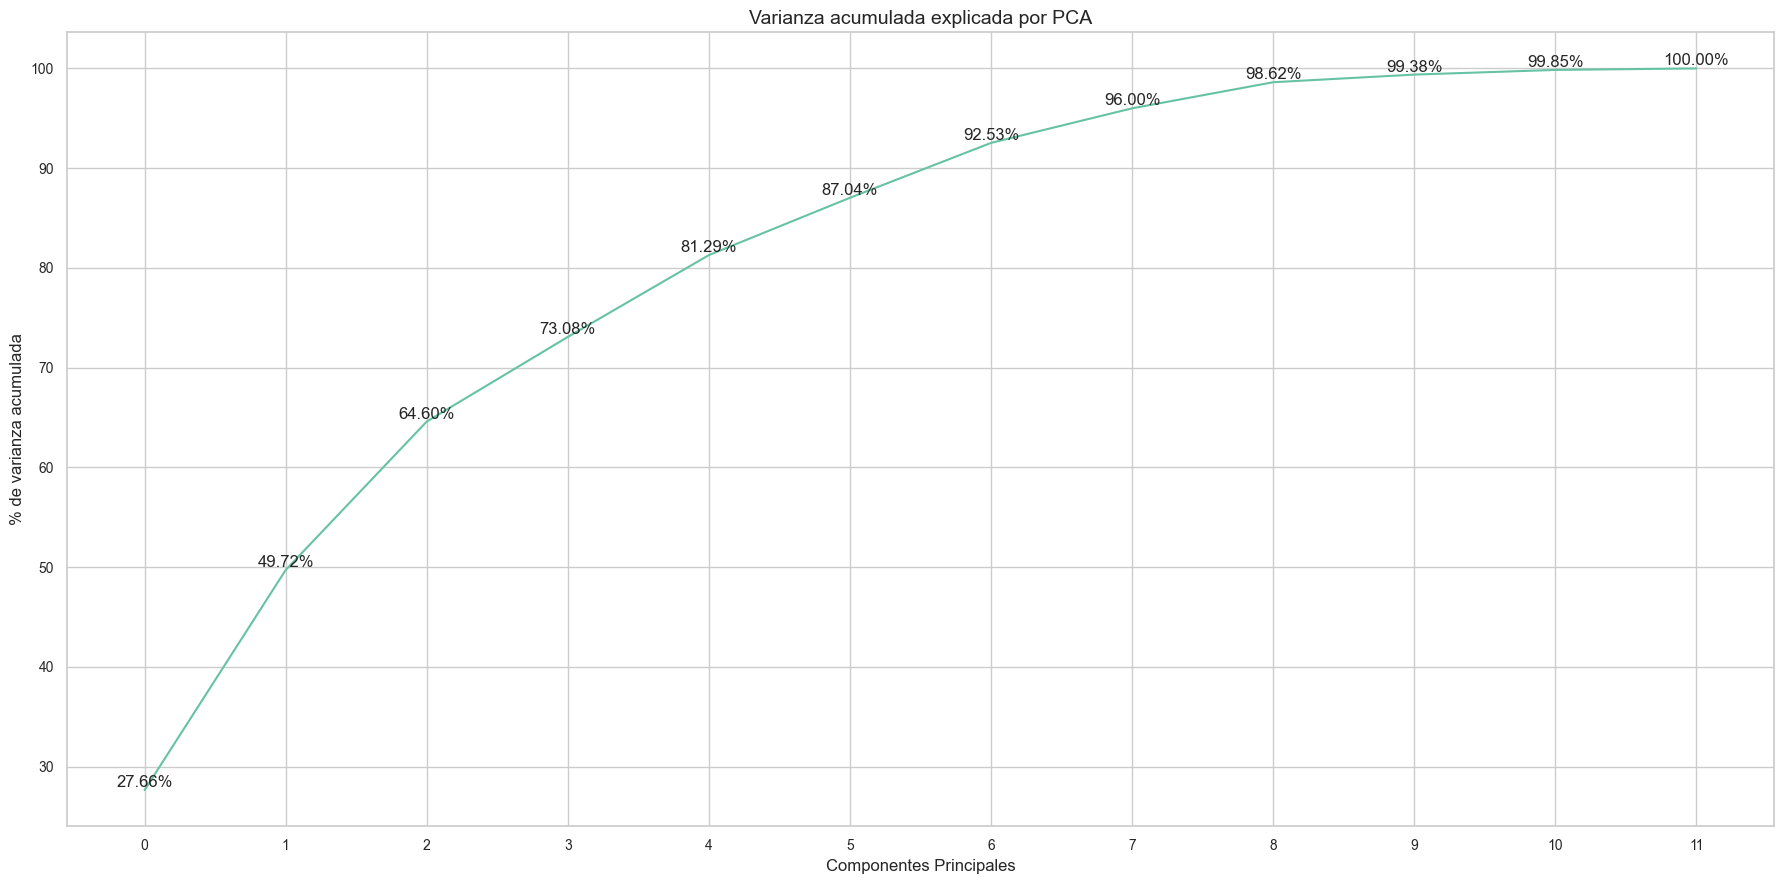

In [31]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_)*100)
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('% de varianza acumulada')
plt.xticks(np.arange(0,n_components,1))

labels = np.cumsum(pca_model.explained_variance_ratio_)*100
for i in range(n_components):
  plt.text(i, labels[i], f'{labels[i]:.2f}%', ha='center', va='bottom')

In [32]:

pca_loadings_df = pd.DataFrame(
    abs(pca_model.components_[:n_components]),
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(n_components)]
).T

# Convert DataFrame to HTML
pca_loadings_html = pca_loadings_df.to_html(float_format="{:.4f}".format)

# Display the formatted DataFrame
display(HTML(pca_loadings_html))


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
calories,0.0366,0.5711,0.0779,0.1640,0.1867,0.1968,0.0623,0.0049,0.0432,0.4958,0.1913,0.5269
protein,0.3309,0.0454,0.3264,0.2813,0.3721,0.1768,0.2606,0.4186,0.5184,0.0196,0.0154,0.1433
fat,0.2125,0.2491,0.2913,0.1243,0.5974,0.2998,0.2478,0.0541,0.4380,0.1479,0.0039,0.2599
sodium,0.0509,0.3047,0.3431,0.1689,0.2923,0.4620,0.6083,0.1675,0.2473,0.0055,0.0082,0.0088
fiber,0.4586,0.2010,0.1739,0.0753,0.2297,0.0846,0.0957,0.2182,0.2581,0.2928,0.6377,0.1939
carbo,0.2686,0.1757,0.5130,0.0713,0.1918,0.4463,0.0270,0.1720,0.1358,0.2439,0.1490,0.5122
sugars,0.0814,0.3648,0.4953,0.0160,0.3604,0.0613,0.1868,0.0678,0.2512,0.2474,0.1280,0.5485
potass,0.5026,0.0703,0.1305,0.1127,0.1249,0.0685,0.1475,0.2657,0.1865,0.1860,0.7066,0.1772
vitamins,0.0188,0.3006,0.3276,0.5948,0.1056,0.2799,0.1680,0.4605,0.3378,0.0520,0.0363,0.0163
shelf,0.3089,0.0651,0.0005,0.6677,0.2655,0.1333,0.1242,0.4160,0.4155,0.0471,0.0510,0.0177


<div class="alert alert-block alert-warning">
8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?
</div>


In [33]:
# Obtener las tres variables más importantes para el primer componente
top_n_vars = 3
sorted_PC1 = pca_loadings_df['PC1'].sort_values(ascending=False)
top_3_vars = sorted_PC1.head(top_n_vars)

# Resaltar las tres variables más importantes en la tabla
highlighted_html = pca_loadings_html
for var in top_3_vars.index:
    highlighted_html = highlighted_html.replace(f'>{var}<', f' style="background-color: #FFEB99; font-weight: bold; color: black">{var}<')

# Mostrar la tabla con las variables resaltadas
display(HTML(highlighted_html))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
calories,0.0366,0.5711,0.0779,0.1640,0.1867,0.1968,0.0623,0.0049,0.0432,0.4958,0.1913,0.5269
protein,0.3309,0.0454,0.3264,0.2813,0.3721,0.1768,0.2606,0.4186,0.5184,0.0196,0.0154,0.1433
fat,0.2125,0.2491,0.2913,0.1243,0.5974,0.2998,0.2478,0.0541,0.4380,0.1479,0.0039,0.2599
sodium,0.0509,0.3047,0.3431,0.1689,0.2923,0.4620,0.6083,0.1675,0.2473,0.0055,0.0082,0.0088
fiber,0.4586,0.2010,0.1739,0.0753,0.2297,0.0846,0.0957,0.2182,0.2581,0.2928,0.6377,0.1939
carbo,0.2686,0.1757,0.5130,0.0713,0.1918,0.4463,0.0270,0.1720,0.1358,0.2439,0.1490,0.5122
sugars,0.0814,0.3648,0.4953,0.0160,0.3604,0.0613,0.1868,0.0678,0.2512,0.2474,0.1280,0.5485
potass,0.5026,0.0703,0.1305,0.1127,0.1249,0.0685,0.1475,0.2657,0.1865,0.1860,0.7066,0.1772
vitamins,0.0188,0.3006,0.3276,0.5948,0.1056,0.2799,0.1680,0.4605,0.3378,0.0520,0.0363,0.0163
shelf,0.3089,0.0651,0.0005,0.6677,0.2655,0.1333,0.1242,0.4160,0.4155,0.0471,0.0510,0.0177


<div class="alert alert-block alert-success">
<b>Respuesta a la pregunta</b> <a class="tocSkip"></a><br>

Las tres variables más importantes en la construcción del primer componente principal (`PC1`) son:

1. **`fiber`**  
2. **`potass`**  
3. **`cups`**  

Estas variables tienen los valores de carga más altos en `PC1`, lo que indica que el primer componente está principalmente asociado con la cantidad de potasio, tazas y fibra de los cereales.

</div>


<div class="alert alert-block alert-warning">
9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.
</div>

In [34]:
useful_categorical_cols = ['mfr', 'shelf']
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = encoder.fit_transform(cereals_df[useful_categorical_cols])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())
df_encoded

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


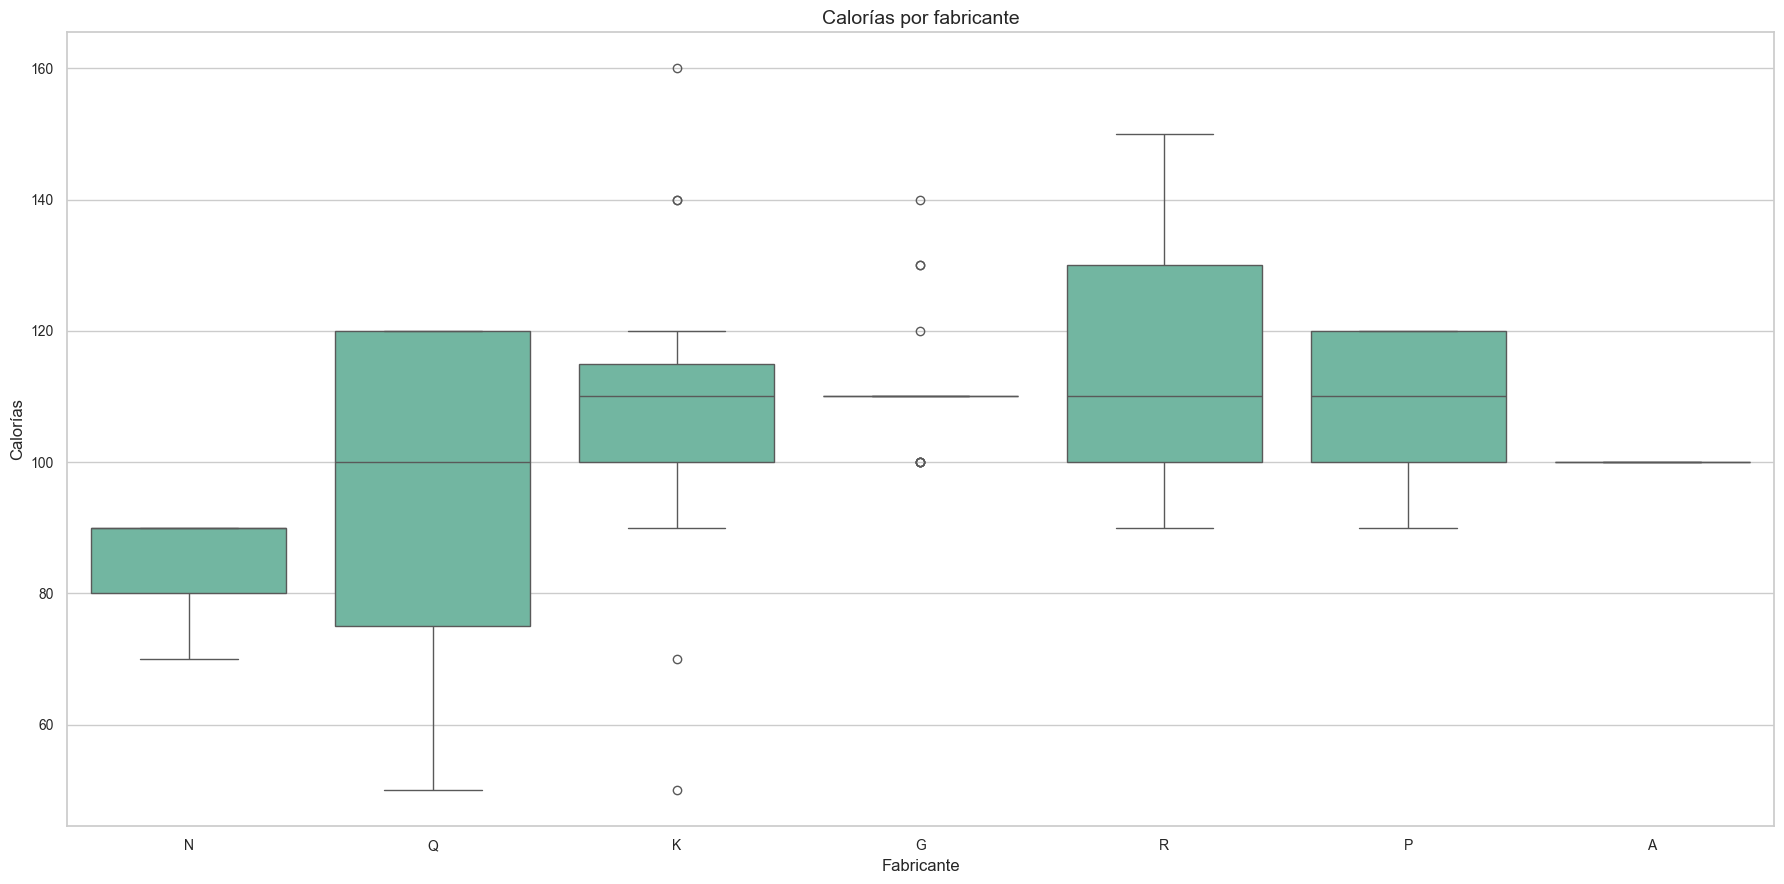

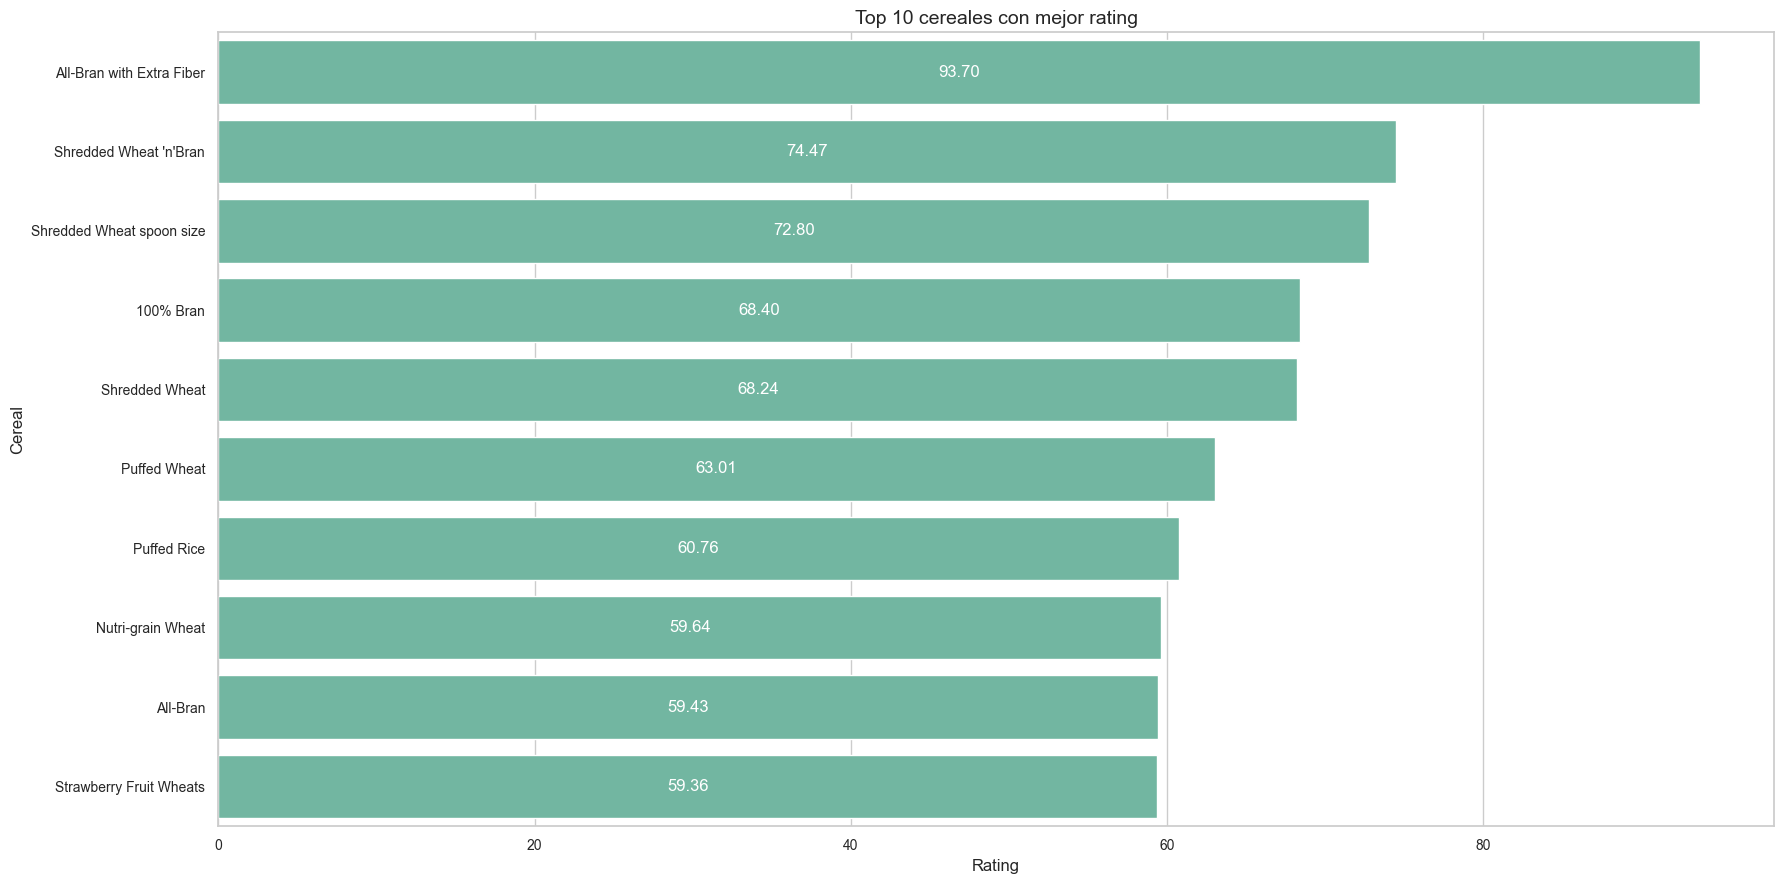

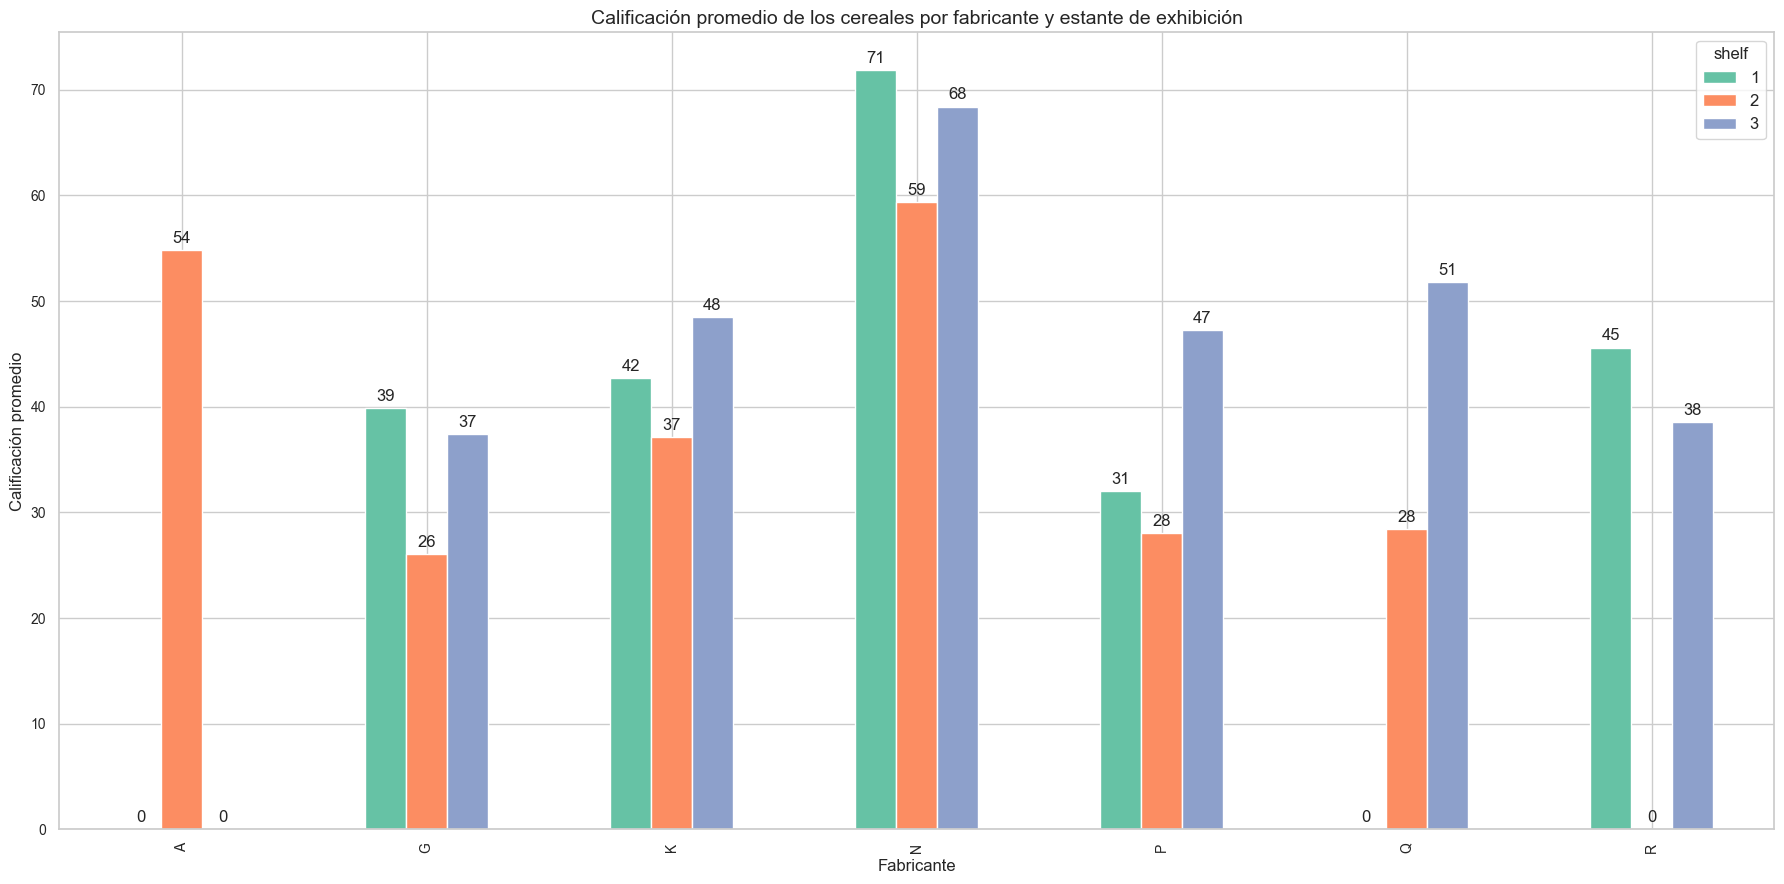

In [35]:
# Importancia del Fabricante (mfr)
# Boxplot de calorías por fabricante
sns.boxplot(data=cereals_df, x='mfr', y='calories')
plt.title('Calorías por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()

# Lista de los 10 cereales mejor calificados
top_10_cereals_df = cereals_df[['name', 'rating', 'mfr']].nlargest(10, 'rating')
top_10_cereals_df['name'] = top_10_cereals_df['name'].str.replace('_', ' ')
ax = sns.barplot(data=top_10_cereals_df, y='name', x='rating')
plt.title('Top 10 cereales con mejor rating')
plt.xlabel('Rating')
plt.ylabel('Cereal')
for index, value in enumerate(top_10_cereals_df['rating']):
    ax.text(value / 2, index, "{:.2f}".format(value), va='center', ha='center', color='white')
plt.show()

# Importancia del Estante (shelf)
# Tabla de calificación promedio de los cereales por fabricante y estante de exhibición
mfr_shelf_rating_df = cereals_df.groupby(['shelf', 'mfr'])['rating'].mean().unstack(fill_value=0)
ax = mfr_shelf_rating_df.T.plot(kind='bar', stacked=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Calificación promedio de los cereales por fabricante y estante de exhibición')
plt.xlabel('Fabricante')
plt.ylabel('Calificación promedio')
plt.show()

<div class="alert alert-block alert-success">
<b>Respuesta a la pregunta</b> <a class="tocSkip"></a><br>

En este análisis, evaluamos si las variables categóricas `mfr` (fabricante) y `shelf` (estante) pueden ser predictores relevantes para el modelo.

1. **Importancia del Fabricante (`mfr`)**  
   - Al observar los boxplots de calorías por fabricante y la lista de los 10 cereales mejor calificados, se nota que ciertas marcas, como Nabisco, tienden a producir cereales con un menor contenido calórico y, al mismo tiempo, tienen algunos de los productos con las mejores calificaciones (`rating`).  
   - Esto sugiere que la marca podría influir en la calidad percibida del cereal, posiblemente debido a diferencias en la formulación, ingredientes o estrategias de marketing.

2. **Importancia del Estante (`shelf`)**  
   - Analizando la tabla `mfr_shelf_rating_df`, que muestra la calificación promedio de los cereales por fabricante y estante de exhibición, se observa una tendencia en la que los cereales ubicados en el **segundo estante** (`shelf=2`) tienden a tener calificaciones más bajas en promedio.  
   - Esto podría estar relacionado con estrategias de colocación en tiendas, donde los cereales más atractivos o saludables se ubican en posiciones más visibles para los consumidores.

3. **Técnica de Codificación**  
   - Dado que tanto `mfr` como `shelf` son variables categóricas sin un orden natural entre sus valores (es decir, son **categóricas nominales**), la mejor estrategia para convertirlas en variables numéricas es **One-Hot Encoding**.  
   - Esta técnica transforma cada categoría en una columna binaria (0 o 1), permitiendo que el modelo interprete la información sin asumir una relación ordinal entre los valores.

Por lo tanto, aplicamos **One-Hot Encoding** a `mfr` y `shelf` para incorporarlas como predictores en el análisis de componentes principales.


</div>

<div class="alert alert-block alert-warning">

10.  Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

</div>

In [36]:
results_df = X_pca_df.iloc[:,0:n_components]
results_df.columns = ['PC{}'.format(i) for i in range(1, n_components + 1)]
results_df = pd.concat([results_df, df_encoded, y], axis=1)
results_df.T


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
PC1,4.870399,1.761110,4.727161,5.142814,-0.332394,-1.086314,1.051039,0.013431,1.626770,-0.876758,...,-0.662330,-0.693165,-1.539257,2.454363,0.206390,-1.059199,-1.595568,-0.134252,-0.674537,-1.143818
PC2,-2.934238,0.210993,-2.402254,-4.401826,0.284619,0.216587,2.163380,-0.902700,-1.323289,1.240858,...,-0.367586,-1.574289,1.446575,3.834955,0.561603,0.475067,0.574653,-0.612590,-0.568589,0.242767
PC3,-0.055266,-3.014058,0.869028,1.883153,-1.490929,-1.550491,0.442223,0.272070,0.953557,-1.871317,...,2.077412,-0.114259,2.104093,1.245213,2.141256,1.161330,-1.671901,1.181098,1.163186,-0.212062
PC4,0.244647,-0.494129,-0.095823,0.209854,-0.944313,0.277791,-0.376563,-0.948236,0.406034,0.044138,...,-1.971818,0.404517,2.619978,1.315391,2.318287,0.495373,0.380863,-1.357046,-1.330649,-0.938300
PC5,-1.102035,3.275506,-1.357388,-1.662387,-0.311262,-1.055048,0.695595,-0.988637,-0.857602,-0.272644,...,0.762788,-0.202930,0.737714,-1.299508,0.323846,0.749484,-0.489233,-0.190222,0.088594,-0.474932
PC6,0.904575,1.065041,1.393861,0.955808,0.828872,0.197062,-0.892245,0.247765,0.162269,0.395404,...,0.901699,-0.681927,0.364781,0.314628,1.385848,-0.773891,0.116453,0.163728,0.644712,-0.049165
PC7,0.235388,-0.489640,1.210340,-0.289695,0.493652,-0.957377,0.360281,0.649145,0.385212,1.209277,...,-0.849235,-1.496951,0.000171,-2.109580,-0.523377,1.520184,-0.204196,0.799693,-0.247744,0.559350
PC8,-0.247787,0.895201,0.182089,0.865569,-0.808361,-0.227710,0.552310,-0.290577,0.553280,-0.066804,...,-1.595069,0.279822,-0.531666,-0.040796,-0.588472,0.690165,0.259556,-0.616101,0.009124,-0.628678
PC9,-0.124799,-0.835394,0.139267,-0.682678,-0.712896,0.922776,0.252020,-1.077927,0.613678,-0.236089,...,1.796432,-0.488184,-0.826462,-0.625335,-0.707986,0.353600,-0.021133,-0.591177,-0.604610,-0.443830
PC10,-0.046331,0.595071,-0.090776,-0.099300,0.100511,-0.152847,0.732787,-0.074291,-0.199357,-0.043728,...,0.117434,0.203077,-0.012864,0.271306,0.009397,0.017534,0.100748,-0.112252,0.008312,-0.191621


In [37]:
results_df.to_csv('PCAresults.csv')

In [38]:
results_df.to_pickle('PCAresults.pkl')

# Conclusión General del Proyecto

El presente análisis de datos sobre cereales tuvo como objetivo explorar la relación entre sus características nutricionales y la calificación otorgada por los consumidores, utilizando técnicas de análisis exploratorio de datos (EDA) y reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA).

Durante el análisis, se identificó que variables como el contenido de fibra y azúcar tienen una fuerte correlación con la calificación de los cereales, lo que sugiere que los consumidores valoran productos con mejores perfiles nutricionales. La aplicación de PCA permitió reducir la dimensionalidad del conjunto de datos sin perder información relevante, lo que facilita su interpretación y mejora la eficiencia de futuros modelos predictivos.

Desde el punto de vista tecnológico, el proyecto utilizó **Python** y librerías especializadas como **pandas, numpy, matplotlib, seaborn y scikit-learn** para la manipulación y visualización de datos, así como para la implementación del PCA. No obstante, PCA tiene limitaciones, ya que asume relaciones lineales entre las variables y no siempre preserva la interpretabilidad de los datos originales. Además, al tratarse de un análisis basado en correlaciones, no podemos inferir causalidad entre las variables y la calificación de los cereales.

Un punto clave para futuras aplicaciones predictivas es la necesidad de **dividir los datos en conjuntos de entrenamiento y prueba (train-test split)**. Si no se realiza esta separación antes de aplicar PCA, se corre el riesgo de **data leakage**, es decir, que información del conjunto de prueba influya en la transformación de los datos, lo que llevaría a una sobreestimación del desempeño del modelo. Por lo tanto, para construir modelos de predicción de calificación de cereales, sería esencial dividir los datos antes de aplicar cualquier transformación o reducción de dimensionalidad.

En conclusión, este proyecto demuestra la importancia del análisis de datos en la evaluación de productos alimenticios y la utilidad de técnicas como PCA para la reducción de dimensionalidad. No obstante, cualquier aplicación en modelos predictivos debe considerar buenas prácticas de machine learning, como la separación adecuada de los datos, para evitar sesgos en los resultados.


## **Referencias**

Crawford, C. (2017). *80 Cereals* [Data set]. Kaggle.  
&nbsp;&nbsp;&nbsp;&nbsp;Disponible en [https://www.kaggle.com/datasets/crawford/80-cereals](https://www.kaggle.com/datasets/crawford/80-cereals)  

Parte, K. (2020). *Dimensionality Reduction: Principal Component Analysis*. Analytics Vidhya.  
&nbsp;&nbsp;&nbsp;&nbsp;Disponible en [https://medium.com/analytics-vidhya/dimensionality-reduction-principal-component-analysis-d1402b58feb1](https://medium.com/analytics-vidhya/dimensionality-reduction-principal-component-analysis-d1402b58feb1)  
